# **Feature Selection Methods**

![Image](https://thumbs.dreamstime.com/b/sky-panoramic-banner-background-cloud-sunset-clouds-154560508.jpg)

[Image Credit](https://thumbs.dreamstime.com)

In this notebook, we take a look at different feature selection methods in a supervised learning problem (both regression and classification). As a case study, the processed training data of the `forest covertypes` project (can be seen [here](https://github.com/Behzad-h/forest_covertypes)) is used.

The main references infculde:<br>
[1] [https://machinelearningmastery.com](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)<br>
[2] [https://www.analyticsvidhya.com](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/)<br>
[3] [https://medium.com](https://medium.com/@hertan06/which-features-to-use-in-your-model-350630a1e31c#:~:text=Mutual_info_classif,which%20has%20most%20information%20gain.)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# import dataset
data = pd.read_csv('train.csv')
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Soil_Type_code,Wilderness_Area_code
0,12,2886,151,11,371,26,5253,234,240,136,...,0,0,0,0,0,0,0,2,30,1
1,15,2503,157,4,67,4,674,224,240,151,...,0,0,0,0,0,0,0,5,18,1
2,16,2495,51,7,42,2,752,224,225,137,...,0,0,0,0,0,0,0,5,16,1
3,18,2517,72,7,85,6,595,228,227,133,...,0,0,0,0,0,0,0,5,18,1
4,19,2504,0,4,95,5,691,214,232,156,...,0,0,0,0,0,0,0,5,18,1


**What is feature selection?**<br>
It is the process of reducing the number of attribute variables (features) in a dataset when we are developing predictive models.<br>

**Why feature selection is important?**<br>
Reducing the number of features helps to reduce the computational burden and training time of the models. In some cases, it also improves the performance of the models. <br>

**What are the feature selection methods for supervised learning?**
These methods are:<br>

**1. Filter methods:** 
They score the correlation or dependence between the features using statistical measures. They are fast and computationally inexpensive. They include:
* Information Gain (Mutual Information)
* Chi-square Test
* Fisher’s Score
* Pearson Coefficient
* Spearsman's Coefficient
* Variance Threshold
* Mean Absolute Difference (MAD)
* Dispersion ratio
* ANOVA correlation coefficient (linear)
* Kendall’s rank coefficient (nonlinear) 

**2. Intrinsic (embedded) methods:** 
They are the models that intrinsicly evaluate the selection of different features to present the best performance. They include:
* Regularization
* Tree-Based Models

**3. Wrapper methods:** 
They select features based on a specific machine learning algorithm that is being fit on a given dataset. These methods evaluate all the possible combinations of features against the evaluation criterion. The wrapper methods usually result in better predictive accuracy than filter methods but they are usually computationally expensive. They include:<br>
* Forward Feature Selection
* Backward Feature Elimination
* Exhaustive Feature Selection
* Recursive Feature Elimination



## **1. Filter Methods:**
Let's start with the filter methods. 

#### **1.1 Information Gain-Mutual Information (Target: Numerical and Categorical):**
Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances. [[ref]](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)

Information gain calculates the reduction in entropy from the transformation of a dataset. [[ref]](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/) 

Use:<br>
* For numerical target: `sklearn.feature_selection.mutual_info_regression`
* For categorical target: `sklearn.feature_selection.mutual_info_classif`

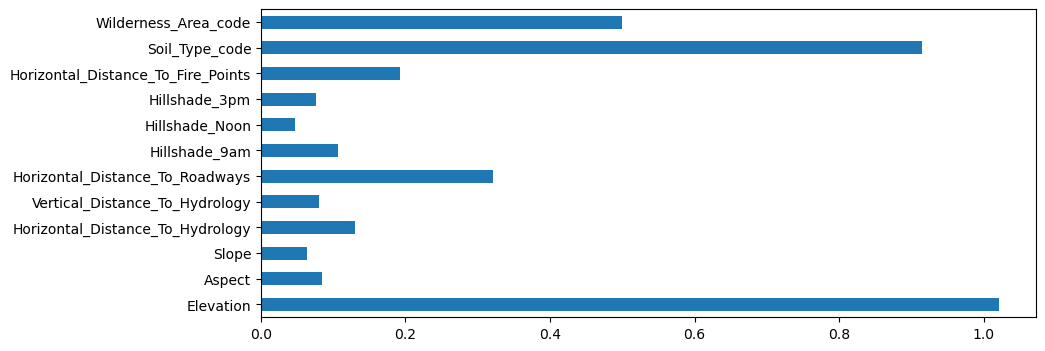

In [7]:
# import libraries
from sklearn.feature_selection import mutual_info_classif

# split dataset into input and output (we choose a subset of features to make the plot more readable) 
columns = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'
           ,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Soil_Type_code','Wilderness_Area_code']
X = data[columns]
y = data['Cover_Type'] # select a categorical target

# calculate the mutual information
importances = mutual_info_classif(X,y)

# plot the importances
importances = pd.Series(importances, X.columns)
importances.plot(kind='barh', figsize=(10,4))
plt.show()

#### **1.2 Chi-square Test (Feature: Categorical-sampled independently-frequency greater than 5, Target: Categorical):**
This score can be used to select the features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes. Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. [[ref]](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)

Chi-squared test assumes a null hypothesis that is two variables are independent and an alternative hypothesis that is two variables are dependent like most of the other statistical tests. By using chi-square test, it calculates p-values of each feature relative to the target. In a simple manner, p is the probability that two variables are independent. Our aim is to determine features that are dependent to target, in other words rejecting null hypothesis. For this reason, we select features with typically has p-value smaller than 0.05. Threshold value 0.05 is just a common behaviour, you can set smaller threshold values like 0.01 in order to be more sure that two groups are dependent. [[ref]](https://medium.com/@hertan06/which-features-to-use-in-your-model-350630a1e31c#:~:text=Mutual_info_classif,which%20has%20most%20information%20gain.)

Use: `sklearn.feature_selection.chi2`

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# select features
columns = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'
           ,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Soil_Type_code','Wilderness_Area_code']
X = data[columns]
y = data['Cover_Type'] # select a categorical target

# convert features of X to categorical values by discretizing values into 10 bins
X = X.apply(pd.cut, bins=10, labels=False)  

# apply SelectKBest class to extract top 3 best features
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
sel_skb_index = fit.get_support()
best_cols = X.iloc[:, sel_skb_index]
print('p_values', fit.pvalues_)
print(best_cols.columns)


p_values [0.00000000e+000 1.13256976e-144 0.00000000e+000 0.00000000e+000
 2.04061263e-019 0.00000000e+000 1.52798689e-066 4.32994860e-039
 4.13162538e-158 0.00000000e+000 0.00000000e+000 0.00000000e+000]
Index(['Elevation', 'Soil_Type_code', 'Wilderness_Area_code'], dtype='object')


#### **1.3 Fisher’s Score (Target: Categorical):**
The algorithm returns the ranks of the variables based on the fisher’s score in descending order. Fisher score is the ratio of between-class variance to within-class variance. The key idea of Fisher score is to find a subset of features, such that in the data space spanned by the selected features, the distances between data points in different classes are as large as possible, while the distances between data points in the same class are as small as possible. [[ref]](https://arxiv.org/abs/1202.3725)

**Note:** The library of scikit-feature can be used to calculate this score and some others. However, it is only compatible with Python 3.6 in Conda. So, here, we only provide the code. (The library can be found [here](https://github.com/charliec443/scikit-feature/blob/master/skfeature/function/similarity_based/fisher_score.py))

Use: `skfeature.function.similarity_based.fisher_score`

In [ ]:
# import libraries
from skfeature.function.similarity_based import fisher_score

# select features
columns = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'
           ,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Soil_Type_code','Wilderness_Area_code']
X = data[columns]
y = data['Cover_Type']

# apply fisher score
score = fisher_score.fisher_score(X, y)

# plot the score
score = pd.Series(score, X.columns)
score.plot(kind='barh', figsize=(10,4))
plt.show()

#### **1.4 Pearson Coefficient (Feature: Numerical, Target: Numerical):**
It measures the **linear** relationship between two variables. These values range between -1 and 1. While values near -1 implies that two variables are inversely proportional, values near 1 implies that two variables are directly proportional. On the other hand, the values near 0 indicates that there is not significant correlation between variables. [[ref]](https://medium.com/@hertan06/which-features-to-use-in-your-model-350630a1e31c#:~:text=Mutual_info_classif,which%20has%20most%20information%20gain.)

Use: `dataframe.corr()` or `sklearn.feature_selection.f_regression`

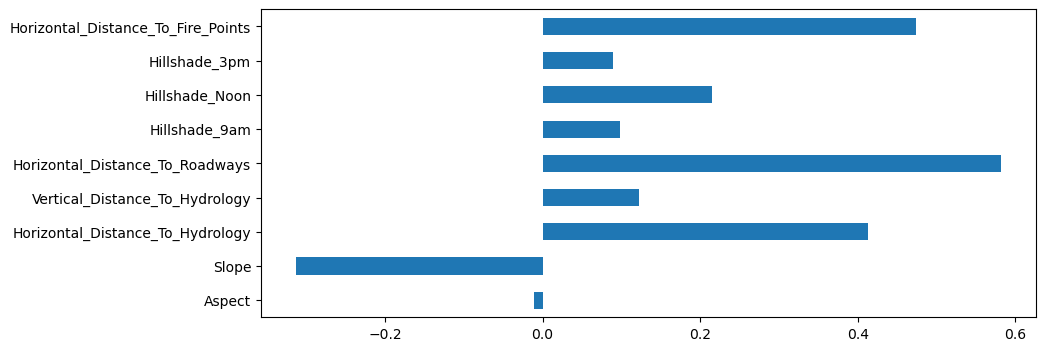

In [36]:
# select numerical features
columns = ['Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'
           ,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
X = data[columns]
y = data['Elevation'] # select a numerical target

# calculate the correlation of X with y
corr = X.corrwith(y)

# plot the correlation
corr = pd.Series(corr, X.columns)
corr.plot(kind='barh', figsize=(10,4))
plt.show()

#### **1.5 Spearman's Coefficient (Feature: Numerical, Target: Numerical):**
The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases. [[ref]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)

Use: `scipy.stats.spearmanr`

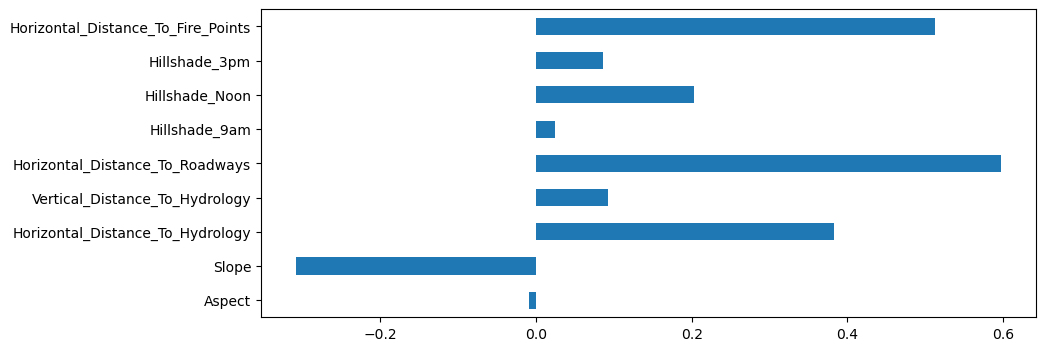

In [37]:
# import libraries
from scipy.stats import spearmanr

# select numerical features
columns = ['Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'
           ,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
X = data[columns]
y = data['Elevation'] # select a numerical target

# calculate the correlation of X with y using spearman correlation
corr = X.apply(lambda x: spearmanr(x, y)[0])

# plot the correlation
corr = pd.Series(corr, X.columns)
corr.plot(kind='barh', figsize=(10,4))
plt.show()

#### **1.6 Variance Threshold (Feature: Numerical):**
The variance threshold is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples. We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawbacks of filter methods. [[ref]](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/)

In [50]:
# import libraries
from sklearn.feature_selection import VarianceThreshold

# select numerical features
columns = ['Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'
           ,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
X = data[columns]

# normalize X between 0 and 1 to be able to compare the variance of the features
X = (X - X.min()) / (X.max() - X.min())

# apply VarianceThreshold with threshold 0.03 for normalized data
sel = VarianceThreshold(threshold=(0.03))
sel.fit_transform(X)
""" Output of get_support(): True means that the variable does not have lower than threshold variance"""
sel_index = sel.get_support()
best_cols = X.iloc[:, sel_index]
print(best_cols.columns)

Index(['Aspect', 'Horizontal_Distance_To_Roadways', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')


#### **1.7 Mean Absolute Difference (MAD) (Feature: Numerical):**
It computes the absolute difference from the mean value. The main difference between the variance and MAD measures is the absence of the square in the latter. The MAD, like the variance, is also a scale variant. This means that higher the MAD, higher the discriminatory power. [[ref]](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/)

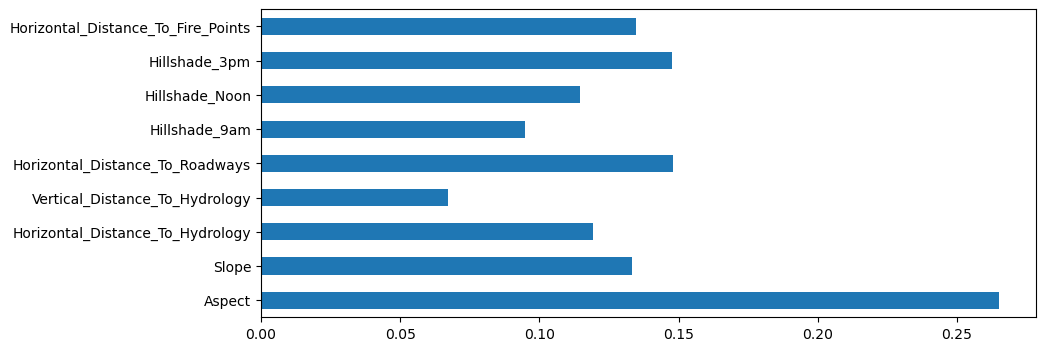

In [57]:
# calculate the MAD
MAD = np.sum(np.abs(X - X.mean()))/len(X)

# select numerical features
columns = ['Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'
           ,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
X = data[columns]

# normalize X between 0 and 1 to be able to compare the MAD for different features
X = (X - X.min()) / (X.max() - X.min())

# plot the MAD
MAD = pd.Series(MAD, X.columns)
MAD.plot(kind='barh', figsize=(10,4))
plt.show()

#### **1.8 Dispersion Ratio (Feature: Numerical):**
It applies the arithmetic mean (AM) and the geometric mean (GM). Then, the dispersion ratio is calculated by dividing AM by GM. Higher dispersion implies a more relevant feature. Conversely, when all the feature samples have (roughly) the same value, it is close to 1, indicating a low relevance feature. Read more [here](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/).

In [110]:
# select numerical features
columns = ['Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'
           ,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
X = data[columns]

# substitute all the values of Aspect by 1 to see the effect of the dispersion ratio on a feature with a constant value
X.loc[:, 'Aspect'] = 1

a_mean = X.mean() # arithmetic mean
g_mean = X.prod()**(1/len(X)) # geometric mean

# calculate the dispersion ratio
disp_ratio = a_mean/g_mean
disp_ratio

Aspect                                1.0
Slope                                 inf
Horizontal_Distance_To_Hydrology      inf
Vertical_Distance_To_Hydrology        inf
Horizontal_Distance_To_Roadways       inf
Hillshade_9am                         inf
Hillshade_Noon                        inf
Hillshade_3pm                         inf
Horizontal_Distance_To_Fire_Points    inf
dtype: float64

#### **1.9 ANOVA correlation coefficient (linear) (Target: Categorical):**
`f_classif` uses the ANOVA f-test for the features, and take into consideration only linear dependency unlike mutual information based feature selection which can capture any kind of statistical dependency. [[ref]](https://medium.com/@hertan06/which-features-to-use-in-your-model-350630a1e31c#:~:text=Mutual_info_classif,which%20has%20most%20information%20gain.)

Use: `sklearn.feature_selection.f_classif`

Elevation 16286.008550426443
Soil_Type_code 6577.128032426492
Wilderness_Area_code 2822.1512209580965
Horizontal_Distance_To_Roadways 1203.1478807896196
Horizontal_Distance_To_Fire_Points 779.065155246395


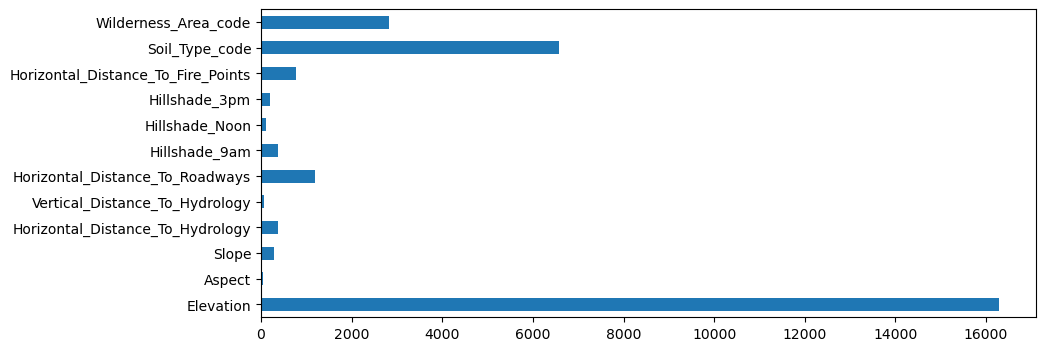

In [121]:
# import libraries
from sklearn.feature_selection import f_classif

# select features
columns = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'
           ,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Soil_Type_code','Wilderness_Area_code']
X = data[columns]
y = data['Cover_Type']

# apply f_classif
threshold = 5 # the number of most relevant features
high_score_features = []
feature_scores = f_classif(X, y)[0]
for score, f_name in sorted(zip(feature_scores, X.columns), reverse=True)[:threshold]:
      print(f_name, score)
      high_score_features.append(f_name)

# plot the scores
feature_scores = pd.Series(feature_scores, X.columns)
feature_scores.plot(kind='barh', figsize=(10,4))
plt.show()

#### **1.10 Kendall’s rank coefficient (nonlinear) (Target: Ordinal Categorical):**
Kendall’s tau is a measure of the correspondence between two rankings. Values close to 1 indicate strong agreement, and values close to -1 indicate strong disagreement. This implements two variants of Kendall’s tau: tau-b (the default) and tau-c (also known as Stuart’s tau-c). These differ only in how they are normalized to lie within the range -1 to 1; the hypothesis tests (their p-values) are identical. Kendall’s original tau-a is not implemented separately because both tau-b and tau-c reduce to tau-a in the absence of ties. [[ref]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)

Use: `scipy.stats.kendalltau`

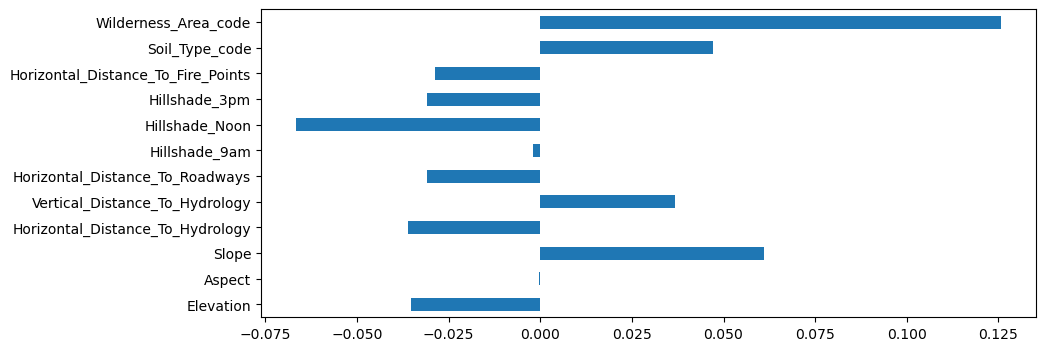

In [122]:
# import libraries
from scipy.stats import kendalltau

# select features
columns = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'
           ,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Soil_Type_code','Wilderness_Area_code']
X = data[columns]
y = data['Cover_Type'] # we assume that the target is ordinal while it is actually not

# calculate the correlation of X with y using kendall correlation
corr = X.apply(lambda x: kendalltau(x, y)[0])

# plot the correlation
corr = pd.Series(corr, X.columns)
corr.plot(kind='barh', figsize=(10,4))
plt.show()

## **2. Intrinsic (Embedded) Methods:**
Embedded methods focus on which features best contribute to the accuracy of the model while the model is being created. These kinds of methods have built-in feature importance evaluation mechanism, and include feature selection inside the training process. [[ref]](https://medium.com/@hertan06/which-features-to-use-in-your-model-350630a1e31c#:~:text=Mutual_info_classif,which%20has%20most%20information%20gain.) 

#### **2.1 Regularization (Feature: Any type, Target: Numerical and Categorical):**
It adds a penalty term to different parameters of the machine learning model for avoiding overfitting in the model. Hence, it shrinks some coefficients to zero. In addition, those features with zero coefficients can be removed from the dataset. [[ref]](https://blog.knoldus.com/how-feature-selection-techniques-for-machine-learning-are-important/)

The regularization methods are:
* Lasso regression (L1 regularization): `sklearn.linear_model.Lasso`
* Ridge regression (L2 regularization): `sklearn.linear_model.Ridge`
* Elastic Nets (L1 and L2 regularization): `sklearn.linear_model.ElasticNet`
* Logistic regression for classification (with options for L1, L2, and elastic net): `sklearn.linear_model.LogisticRegression`
* SVM for classification (with L2 regularization): `sklearn.svm.SVC`

In the following, we use logistic regression for a multiclass classification as an example.

In [136]:
# import libraries
from sklearn.feature_selection import SelectFromModel # selecting features based on importance weights
from sklearn.linear_model import LogisticRegression

# select features
columns = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'
           ,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Soil_Type_code','Wilderness_Area_code']
X = data[columns]
y = data['Cover_Type']

# normalize X between 0 and 1
X = (X - X.min()) / (X.max() - X.min())

# apply SelectFromModel with LogisticRegression
model_lr = LogisticRegression(C=0.1, penalty='l2', random_state=0, max_iter=1000)
model_lr.fit(X, y)

# select features
sel_sfm = SelectFromModel(model_lr, prefit=True)
sel_sfm_index = sel_sfm.get_support()
df_sfm = X.iloc[:, sel_sfm_index]
print(df_sfm.columns)

Index(['Elevation', 'Soil_Type_code', 'Wilderness_Area_code'], dtype='object')


#### **2.2 Tree-Based Models (Feature: Any type, Target: Numerical and Categorical):**
Different tree-based methods of feature selection help us with feature importance to provide a way of selecting features. In addition, feature importance specifies which feature has more importance in model building or has a great impact on the target variable. Random Forest is such a tree-based method, which is a type of bagging algorithm that aggregates a different number of decision trees. It automatically ranks the nodes by their performance or decrease in the impurity (Gini impurity) over all the trees. [[ref]](https://blog.knoldus.com/how-feature-selection-techniques-for-machine-learning-are-important/)

The tree-based models are:
* Decision tree: `sklearn.tree.DecisionTreeClassifier` and `sklearn.tree.DecisionTreeRegressor`
* Gradient boosting tree: `sklearn.ensemble.GradientBoostingClassifier` and `sklearn.ensemble.GradientBoostingRegressor`
* Random forest: `sklearn.ensemble.RandomForestClassifier` and `sklearn.ensemble.RandomForestRegressor`

In the following, we use random forest for a multiclass classification as an example.

Most important features are = Index(['Elevation', 'Soil_Type_code', 'Wilderness_Area_code'], dtype='object')


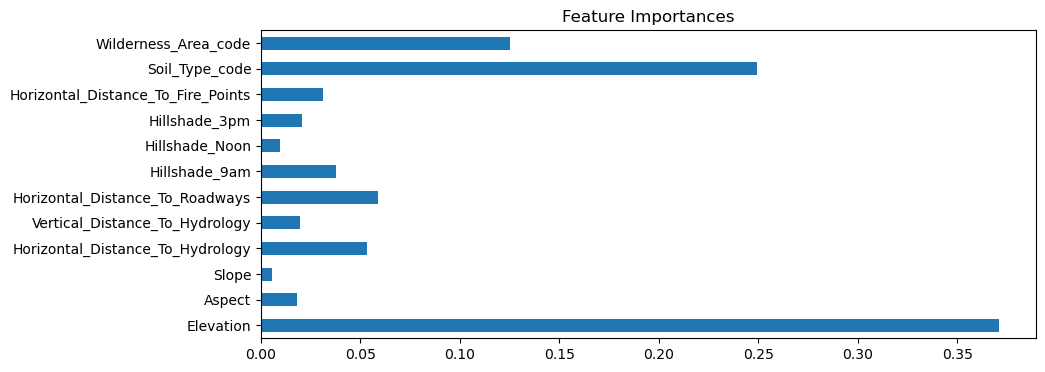

In [147]:
# import libraries
from sklearn.feature_selection import SelectFromModel # selecting features based on importance weights
from sklearn.ensemble import RandomForestClassifier

# select features
columns = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'
           ,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Soil_Type_code','Wilderness_Area_code']
X = data[columns]
y = data['Cover_Type']

# normalize X between 0 and 1
X = (X - X.min()) / (X.max() - X.min())

# apply SelectFromModel with RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=0) 
model_rf.fit(X, y)

# select features
sel_sfm = SelectFromModel(model_rf, prefit=True)
sel_sfm_index = sel_sfm.get_support()
df_sfm = X.iloc[:, sel_sfm_index]
print(f'Most important features are = {df_sfm.columns}')

# plot the feature importances
importances = pd.Series(model_rf.feature_importances_, X.columns)
importances.plot(kind='barh', figsize=(10,4))
plt.title('Feature Importances')
plt.show()

## **3. Wrapper Methods:**
Wrapper methods use iterative searches in order to narrow the features set until acquireing the desired number of features recursively. They are mainly used together with a model. [[ref]](https://medium.com/@hertan06/which-features-to-use-in-your-model-350630a1e31c#:~:text=Mutual_info_classif,which%20has%20most%20information%20gain.)

#### **3.1 Forward Feature Selection:**
Forward selection is an iterative process, which begins with an empty set of features. After each iteration, it keeps adding on a feature and evaluates the performance to check whether it is improving the performance or not. The process continues until the addition of a new variable/feature does not improve the performance of the model. [[ref]](https://blog.knoldus.com/how-feature-selection-techniques-for-machine-learning-are-important/)

Use: `sklearn.feature_selection.SequentialFeatureSelector` >> This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score of an estimator. [[ref]](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html)

In the following, we implement forward feature selection based on a logistic regression model for a multiclass classification problem.

In [148]:
# import libraries
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

# select features
columns = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'
           ,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Soil_Type_code','Wilderness_Area_code']
X = data[columns]
y = data['Cover_Type']

# normalize X between 0 and 1
X = (X - X.min()) / (X.max() - X.min())

# apply SequentialFeatureSelector with LogisticRegression
model_lr = LogisticRegression(C=0.1, class_weight='balanced', random_state=0, max_iter=1000)
sfs = SequentialFeatureSelector(model_lr, n_features_to_select=3, direction='forward') # forward selection with 3 features
sfs.fit(X, y)

# print the selected features
print(f'Selected features are = {X.columns[sfs.get_support()]}')

Selected features are = Index(['Elevation', 'Hillshade_9am', 'Soil_Type_code'], dtype='object')


#### **3.2 Backward Feature Elimination:**
Backward elimination is also an iterative approach, but it is the opposite of forward selection. This technique begins the process by considering all the features and removes the least significant feature. This elimination process continues until removing the features does not improve the performance of the model. [[ref]](https://blog.knoldus.com/how-feature-selection-techniques-for-machine-learning-are-important/)

Use: `sklearn.feature_selection.SequentialFeatureSelector` >> This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score of an estimator. [[ref]](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html)

In the following, we implement backward feature elimination based on a logistic regression model for a multiclass classification problem.

In [150]:
# import libraries
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

# select features
columns = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'
           ,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Soil_Type_code','Wilderness_Area_code']
X = data[columns]
y = data['Cover_Type']

# normalize X between 0 and 1
X = (X - X.min()) / (X.max() - X.min())

# apply SequentialFeatureSelector with LogisticRegression
model_lr = LogisticRegression(C=0.1, class_weight='balanced', random_state=0, max_iter=1000)
sfs = SequentialFeatureSelector(model_lr, n_features_to_select=3, direction='backward') # backward selection with 3 features
sfs.fit(X, y)

# print the selected features
print(f'Selected features are = {X.columns[sfs.get_support()]}')

Selected features are = Index(['Elevation', 'Hillshade_3pm', 'Soil_Type_code'], dtype='object')


#### **3.3 Exhaustive Feature Selection:**
Exhaustive feature selection is one of the best feature selection methods. It evaluates each feature set as brute-force. It means this method tries & make each possible combination of features and return the best performing feature set. [[ref]](https://blog.knoldus.com/how-feature-selection-techniques-for-machine-learning-are-important/)

Use: `mlxtend.feature_selection.ExhaustiveFeatureSelector` (Read more [here](http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/))


In the following, we implement exhaustive feature selection based on a logistic regression model for a multiclass classification problem.

In [157]:
# import libraries
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.linear_model import LogisticRegression

# select features
columns = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'
           ,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Soil_Type_code','Wilderness_Area_code']
X = data[columns]
y = data['Cover_Type']

# normalize X between 0 and 1
X = (X - X.min()) / (X.max() - X.min())

# apply ExhaustiveFeatureSelector with LogisticRegression
model_lr = LogisticRegression(C=0.1, class_weight='balanced', random_state=0, max_iter=1000)
efs = ExhaustiveFeatureSelector(model_lr, min_features=3, max_features=3, scoring='accuracy', cv=2)
efs.fit(X, y)

# print the selected features
print(f'Selected features are = {X.columns[list(efs.best_idx_)]}')


Features: 220/220

Selected features are = Index(['Elevation', 'Hillshade_3pm', 'Soil_Type_code'], dtype='object')


#### **3.4 Recursive Feature Elimination:**
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached. [[ref]](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

Use: `sklearn.feature_seletion.RFE`

In the following, we implement recursive feature elimination based on a logistic regression model for a multiclass classification problem.

In [159]:
# import libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# select features
columns = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'
           ,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Soil_Type_code','Wilderness_Area_code']
X = data[columns]
y = data['Cover_Type']

# normalize X between 0 and 1
X = (X - X.min()) / (X.max() - X.min())

# apply RFE with LogisticRegression
model_lr = LogisticRegression(C=0.1, class_weight='balanced', random_state=0, max_iter=1000)
rfe = RFE(model_lr, n_features_to_select=3)
rfe.fit(X, y)

# print the selected features
print(f'Selected features are = {X.columns[rfe.get_support()]}')

Selected features are = Index(['Elevation', 'Soil_Type_code', 'Wilderness_Area_code'], dtype='object')


**Note: Difference between backward feature elimination and recursive feature elimination:** [[ref]](https://discuss.analyticsvidhya.com/t/how-does-the-recursive-feature-elimination-rfe-works-and-how-it-is-different-from-backward-elimination/74199) <br> 

The backward elimination method works on removing variable iteratively on the basis of p-value.
RFE is also a type of backward elimination method however RFE works on feature ranking system.

First model is fit on linear regression based on all variables. Then, it calculates variable coefficients and their importance. Then, It ranks the variable on the basis on linear regression fit and remove low ranking variable in each iteration.

## **4. Some Other Functions:**
Some other feature selection functions can be found in sklearn library. They include:

* `SelectFpr`: Select features based on a false positive rate test.

* `SelectFdr`: Select features based on an estimated false discovery rate.

* `SelectFwe`: Select features based on family-wise error rate.

* `SelectPercentile`: Select features based on percentile of the highest scores.

For more details, see [here](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection).